**Hotel Data Analysis Project by - Aditi Mane**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("/content/hotel_booking.csv")

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# **Date Cleaning**

In [ ]:

columns_to_drop = [

    'arrival_date_day_of_month',  # Redundant for seasonality analysis

    'company',                   # Not relevant for individual booking analysis

    'name',                      # Personal data

    'email',                     # Personal data

    'phone-number',              # Personal data

    'credit_card',               # Personal data

    'reservation_status',        # Focusing on 'is_canceled' instead

    'booking_changes',           # Not directly relevant

    'days_in_waiting_list',      # Limited relevance

    'meal'                       # does not have relation with the scope of current objectives



]

In [ ]:
data=data.drop(columns=columns_to_drop)

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,0,0,2,0.0,...,0,C,C,No Deposit,NaN,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,0,0,2,0.0,...,0,C,C,No Deposit,NaN,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,0,1,1,0.0,...,0,A,C,No Deposit,NaN,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,2015,July,27,0,1,1,0.0,...,0,A,A,No Deposit,304.0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,2015,July,27,0,2,2,0.0,...,0,A,A,No Deposit,240.0,Transient,98.0,0,1,2015-07-03


In [ ]:
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,4


In [ ]:
data=data.drop(columns=['agent'])

In [ ]:
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,4


In [ ]:
data=data.dropna(subset=['children'])

In [ ]:
data=data.dropna(subset=['country'])

In [ ]:
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   stays_in_weekend_nights         118898 non-null  int64  
 7   stays_in_week_nights            118898 non-null  int64  
 8   adults                          118898 non-null  int64  
 9   children                        118898 non-null  float64
 10  babies                          118898 non-null  int64  
 11  country                         118898 non-null  object 
 12  market_segment       

In [ ]:
data.shape

(118898, 25)

# **Data Preprocessing**

In [ ]:
# Encoding 'arrival_date_month'
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
data['arrival_date_month'] = data['arrival_date_month'].map(month_mapping)



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  int64  
 5   arrival_date_week_number        118898 non-null  int64  
 6   stays_in_weekend_nights         118898 non-null  int64  
 7   stays_in_week_nights            118898 non-null  int64  
 8   adults                          118898 non-null  int64  
 9   children                        118898 non-null  float64
 10  babies                          118898 non-null  int64  
 11  country                         118898 non-null  object 
 12  market_segment       

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()




In [ ]:
data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data['total_guests'] = data['adults'] + data['children']
data['cancellation_ratio'] = data['previous_cancellations'] / (data['previous_bookings_not_canceled'] + 1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  int64  
 5   arrival_date_week_number        118898 non-null  int64  
 6   stays_in_weekend_nights         118898 non-null  int64  
 7   stays_in_week_nights            118898 non-null  int64  
 8   adults                          118898 non-null  int64  
 9   children                        118898 non-null  float64
 10  babies                          118898 non-null  int64  
 11  country                         118898 non-null  object 
 12  market_segment       

In [ ]:
print("Unique Reserved Room Types:", data['reserved_room_type'].unique())
print("Unique Customer Types:", data['customer_type'].unique())


Unique Reserved Room Types: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B' 'P']
Unique Customer Types: ['Transient' 'Contract' 'Transient-Party' 'Group']


In [ ]:
# Define mappings
room_type_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8,
    'L': 9
}

customer_type_mapping = {
    'Transient': 1,
    'Transient-Party': 2,
    'Contract': 3,
    'Group': 4
}


In [ ]:

data['reserved_room_type_code'] = data['reserved_room_type'].map(room_type_mapping)
data['assigned_room_type_code'] = data['assigned_room_type'].map(room_type_mapping)
data['customer_type_code'] = data['customer_type'].map(customer_type_mapping)


In [ ]:

cleaned_data = data.drop(columns=['reserved_room_type', 'customer_type'])


In [ ]:
label_encoder = LabelEncoder()




data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['reservation_year'] = data['reservation_status_date'].dt.year
data['reservation_month'] = data['reservation_status_date'].dt.month
data['reservation_day'] = data['reservation_status_date'].dt.day


data.drop('reservation_status_date', axis=1, inplace=True)



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  int64  
 5   arrival_date_week_number        118898 non-null  int64  
 6   stays_in_weekend_nights         118898 non-null  int64  
 7   stays_in_week_nights            118898 non-null  int64  
 8   adults                          118898 non-null  int64  
 9   children                        118898 non-null  float64
 10  babies                          118898 non-null  int64  
 11  country                         118898 non-null  object 
 12  market_segment       

# **EDA**

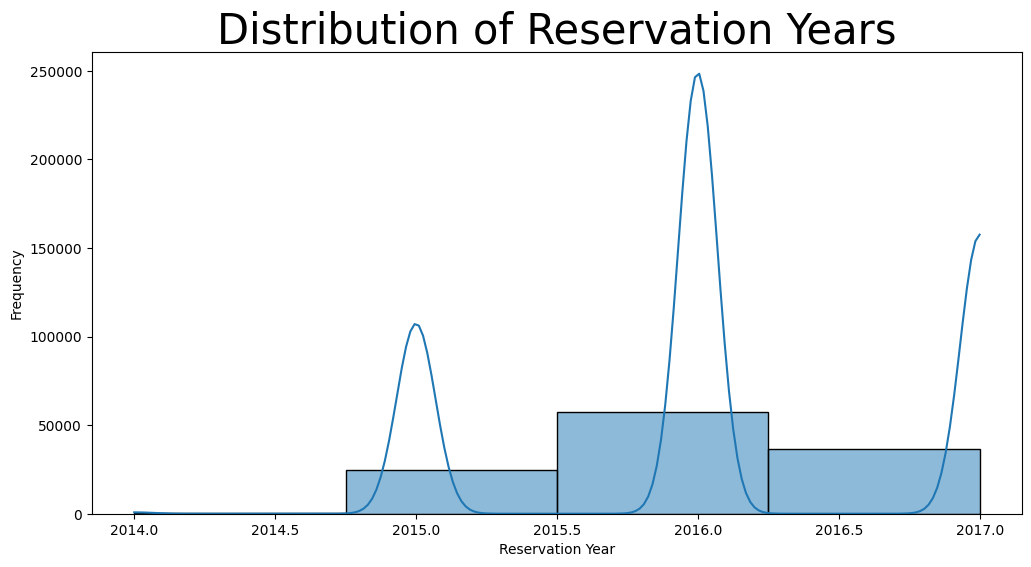

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['reservation_year'], bins=4, kde=True)
plt.title('Distribution of Reservation Years',fontsize=30)
plt.xlabel('Reservation Year')
plt.ylabel('Frequency')
plt.show()



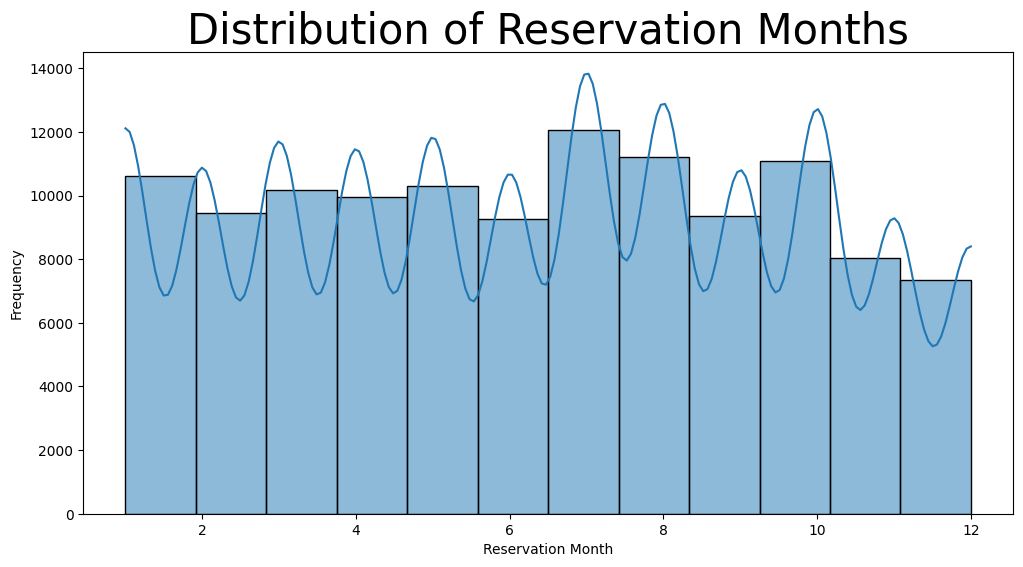

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['reservation_month'], bins=12, kde=True)
plt.title('Distribution of Reservation Months',fontsize=30)
plt.xlabel('Reservation Month')
plt.ylabel('Frequency')
plt.show()



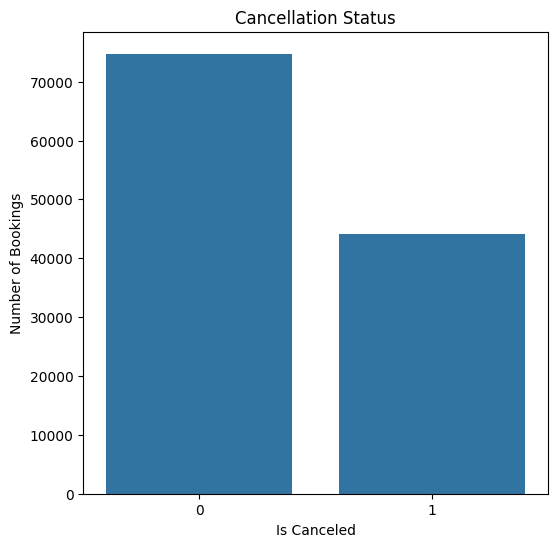

In [ ]:

plt.figure(figsize=(6, 6))
sns.countplot(x='is_canceled', data=data)
plt.title('Cancellation Status')
plt.xlabel('Is Canceled')
plt.ylabel('Number of Bookings')
plt.show()



Cancellation Rate: is_canceled
0    0.628648
1    0.371352
Name: proportion, dtype: float64


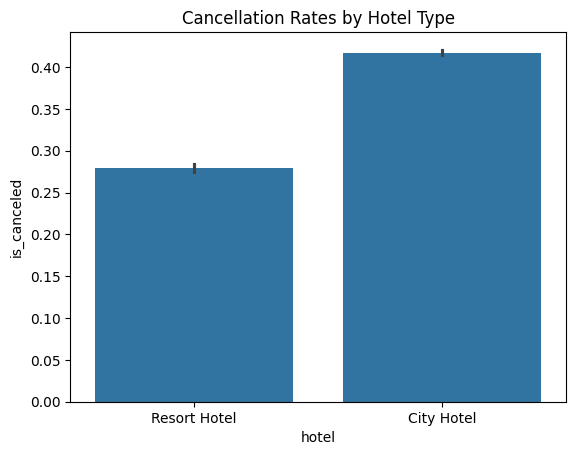

In [ ]:
# Cancellation rates
cancellation_rate = data['is_canceled'].value_counts(normalize=True)
print("Cancellation Rate:", cancellation_rate)

sns.barplot(data=data, x='hotel', y='is_canceled')
plt.title('Cancellation Rates by Hotel Type')
plt.show()


In [ ]:
resort_hotel = data[data['hotel'] == 'Resort Hotel']
city_hotel = data[data['hotel'] == 'City Hotel']

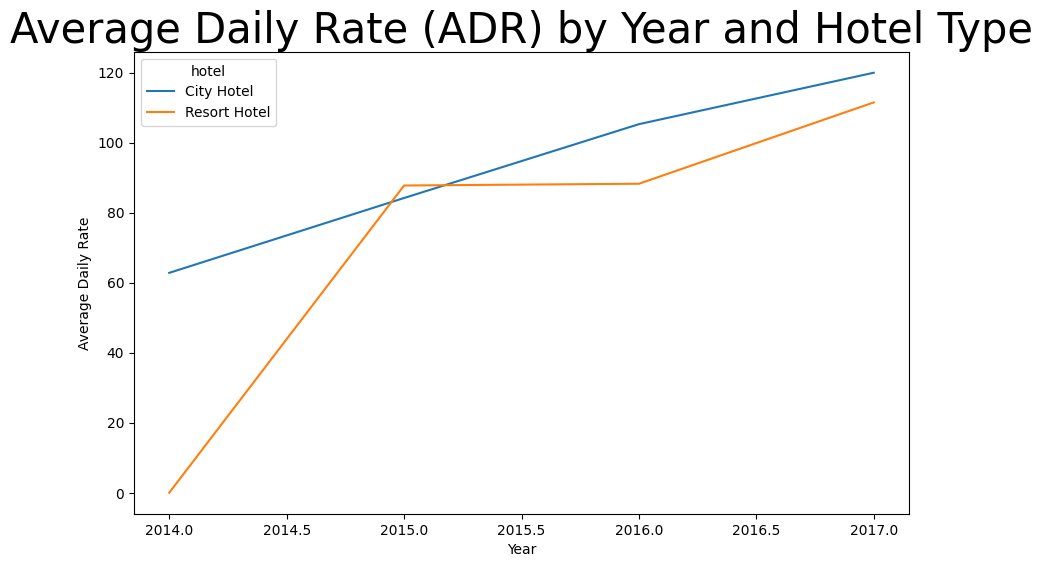

In [ ]:
adr_by_year_hotel = data.groupby(['reservation_year', 'hotel'])['adr'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='reservation_year', y='adr', hue='hotel', data=adr_by_year_hotel)
plt.title('Average Daily Rate (ADR) by Year and Hotel Type',fontsize=30)
plt.xlabel('Year')
plt.ylabel('Average Daily Rate')
plt.show()

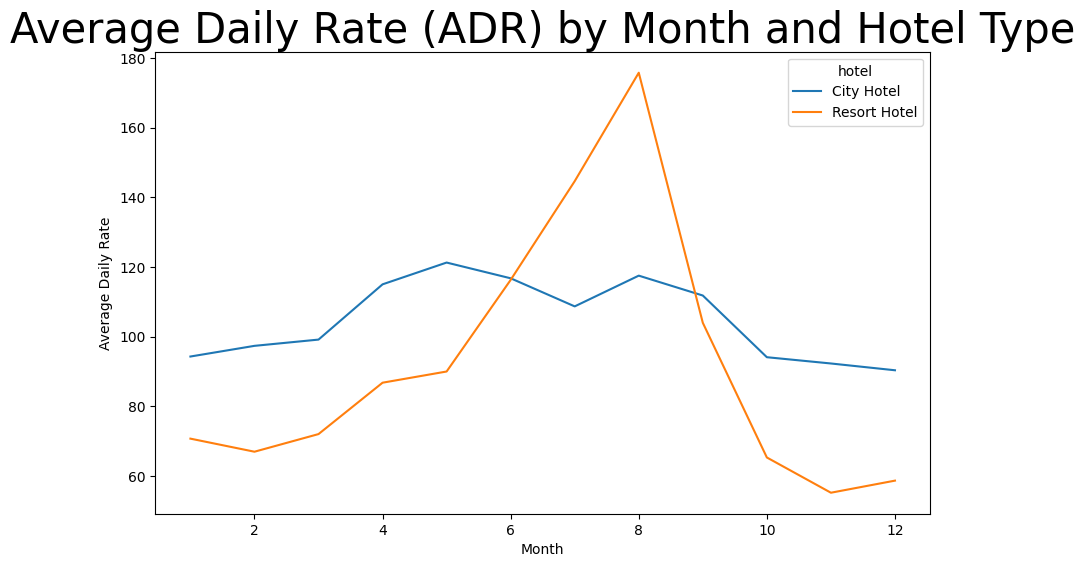

In [ ]:
adr_by_year_hotel = data.groupby(['reservation_month', 'hotel'])['adr'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='reservation_month', y='adr', hue='hotel', data=adr_by_year_hotel)
plt.title('Average Daily Rate (ADR) by Month and Hotel Type',fontsize=30)
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.show()

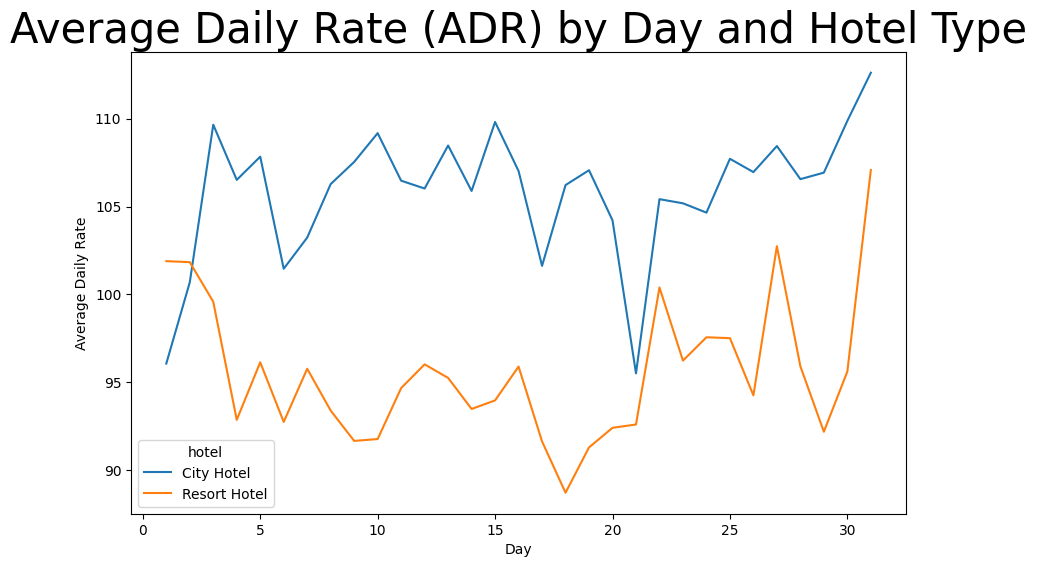

In [ ]:
adr_by_year_hotel = data.groupby(['reservation_day', 'hotel'])['adr'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='reservation_day', y='adr', hue='hotel', data=adr_by_year_hotel)
plt.title('Average Daily Rate (ADR) by Day and Hotel Type',fontsize=30)
plt.xlabel('Day')
plt.ylabel('Average Daily Rate')
plt.show()

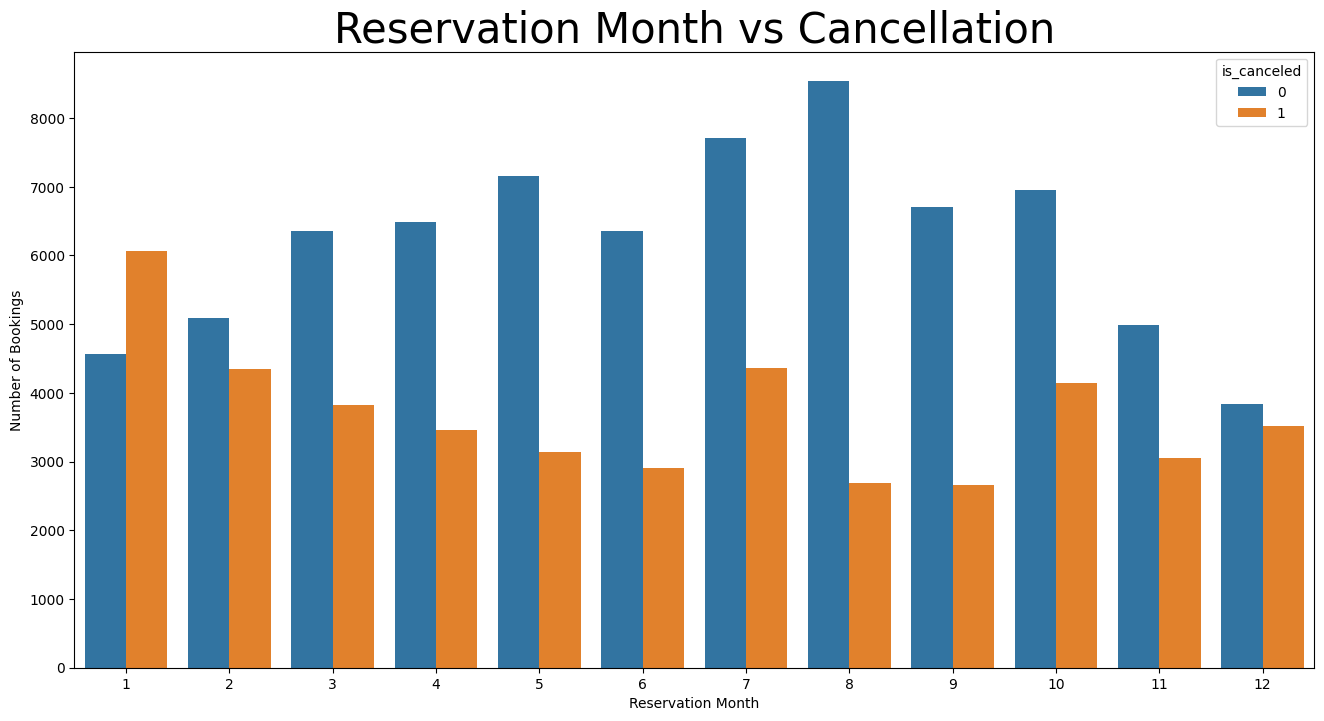

In [ ]:
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='reservation_month',hue='is_canceled',data=data)
plt.title('Reservation Month vs Cancellation',fontsize=30)
plt.xlabel('Reservation Month')
plt.ylabel('Number of Bookings')
plt.show()

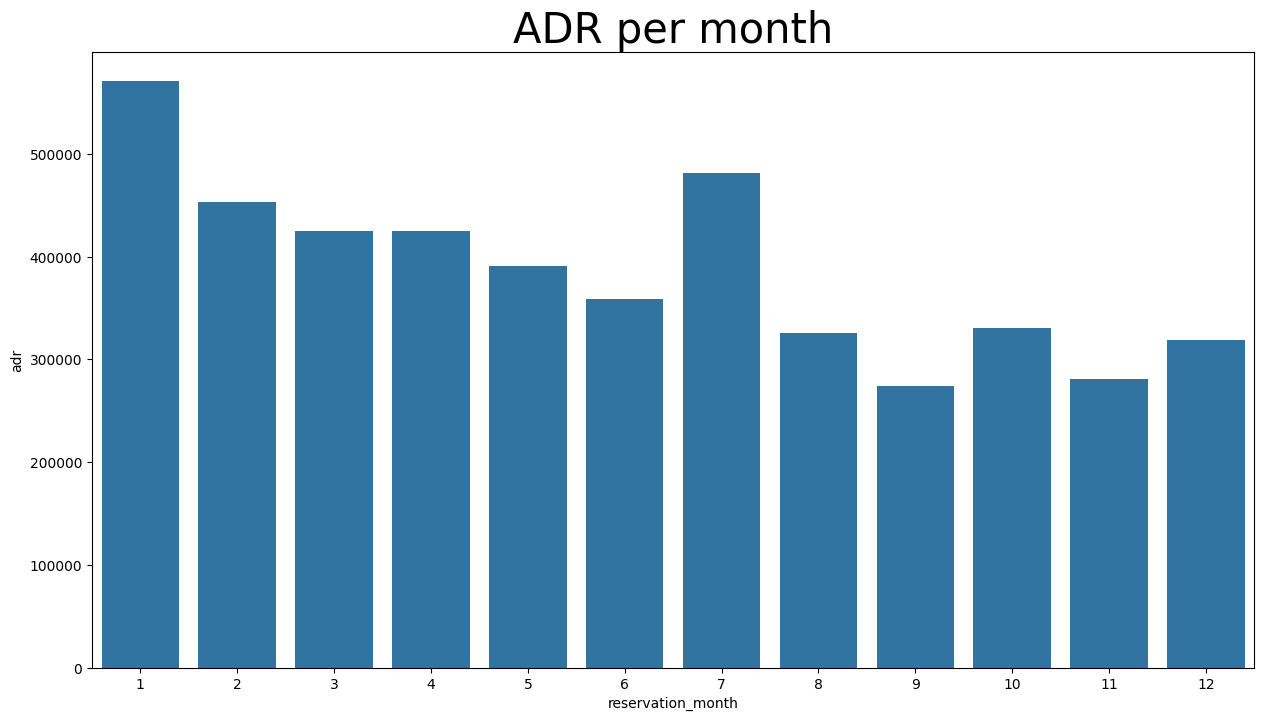

In [ ]:
plt.figure(figsize=(15,8))
plt.title('ADR per month',fontsize=30)

sns.barplot(x='reservation_month', y='adr', data=data[data['is_canceled']==1].groupby('reservation_month')[['adr']].sum().reset_index())
plt.show()

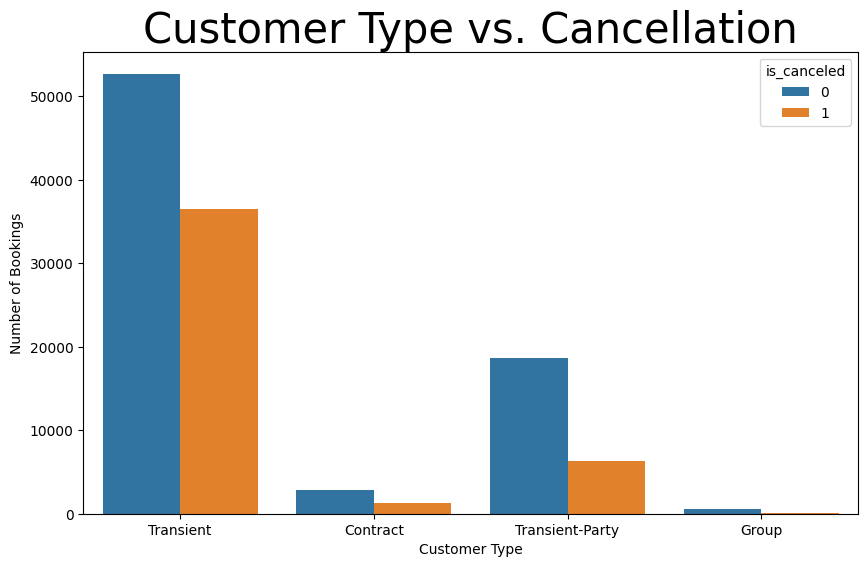

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', hue='is_canceled', data=data)
plt.title('Customer Type vs. Cancellation',fontsize=30)
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.show()



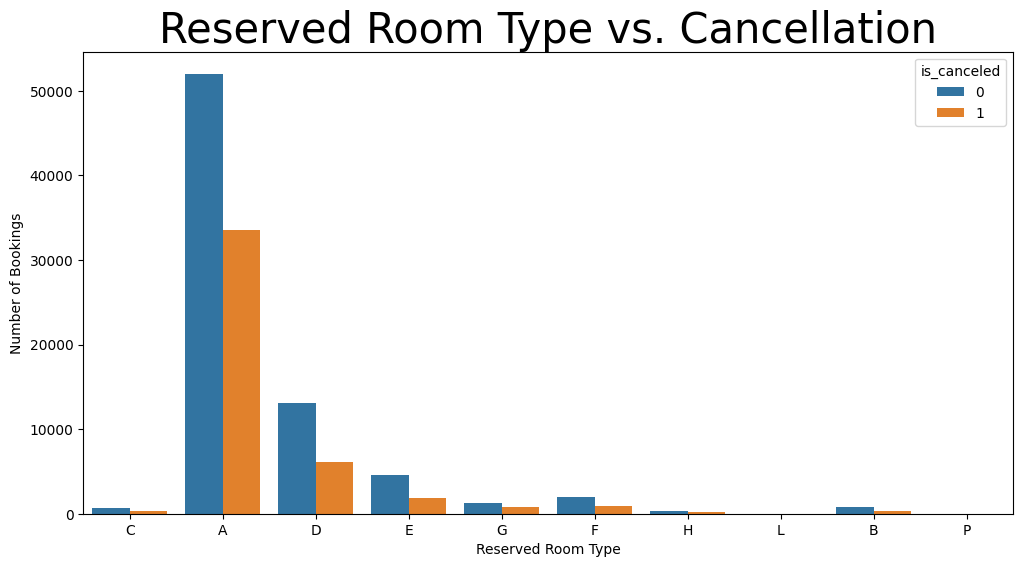

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='reserved_room_type', hue='is_canceled', data=data)
plt.title('Reserved Room Type vs. Cancellation',fontsize=30)
plt.xlabel('Reserved Room Type')
plt.ylabel('Number of Bookings')
plt.show()



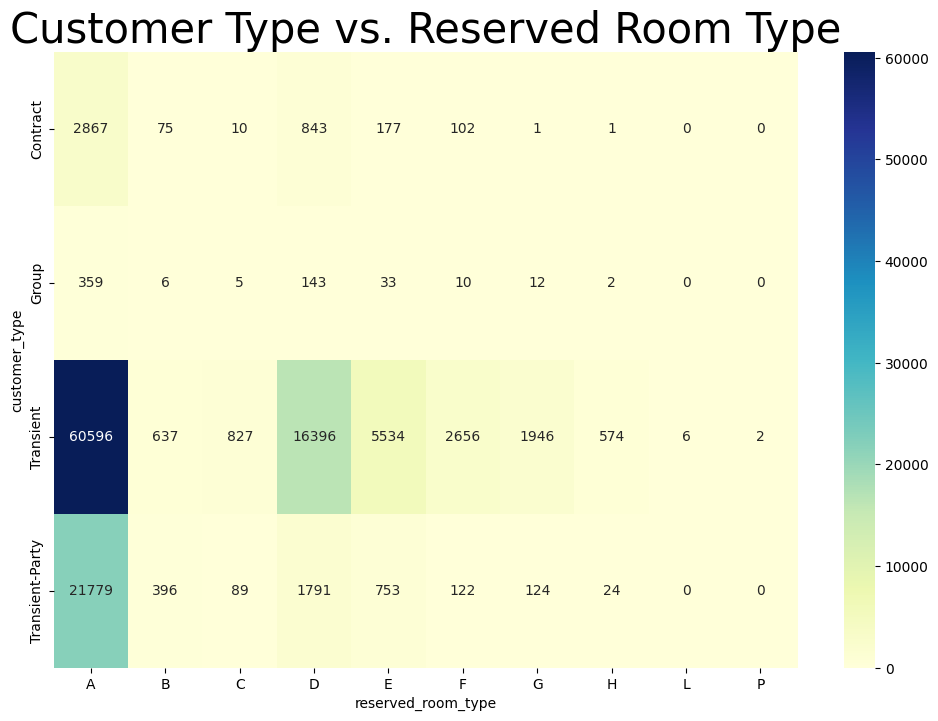

In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(data['customer_type'], data['reserved_room_type']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Customer Type vs. Reserved Room Type',fontsize=30)
plt.show()



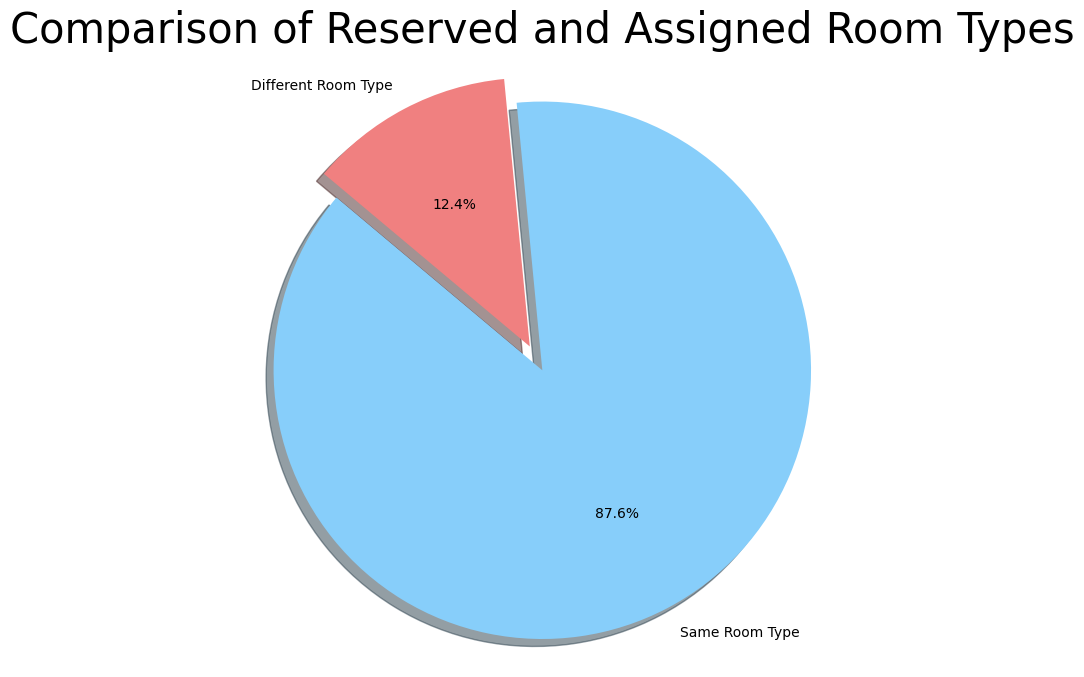

In [ ]:
same_room_type_count = len(data[data['reserved_room_type_code'] == data['assigned_room_type_code']])

total_bookings = len(data)

labels = ['Same Room Type', 'Different Room Type']
sizes = [same_room_type_count, total_bookings - same_room_type_count]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Comparison of Reserved and Assigned Room Types',fontsize=30)
plt.axis('equal')
plt.show()

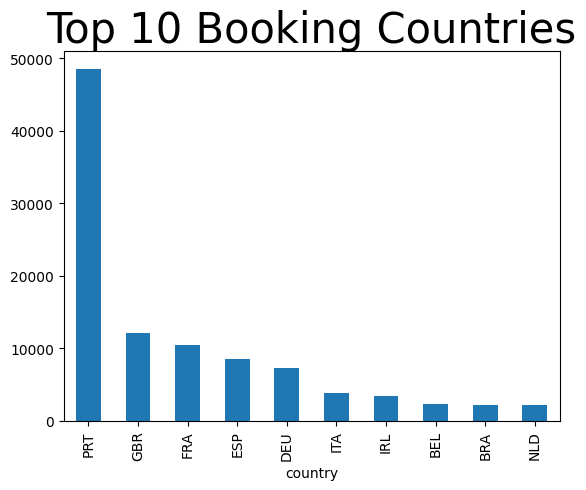

In [ ]:
# Country-based bookings (top 10 countries)
top_countries = data['country'].value_counts().head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Booking Countries',fontsize=30)
plt.show()

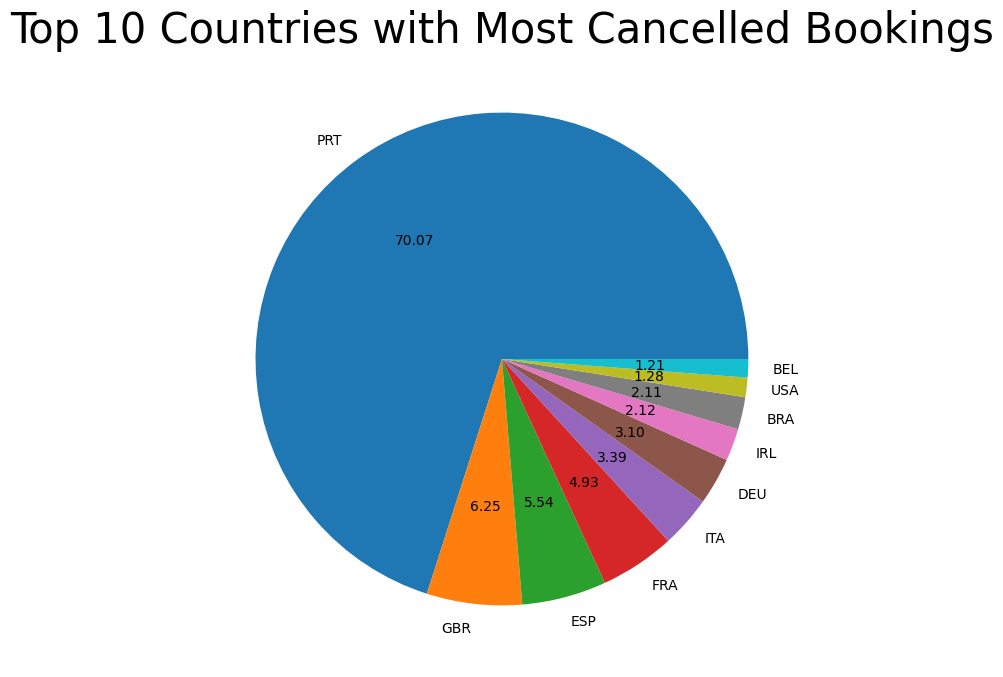

In [ ]:
cancelled_bookings = data[data['is_canceled'] == 1]
top_10_countries = cancelled_bookings['country'].value_counts().head(10)
plt.figure(figsize=(20,8))
plt.title('Top 10 Countries with Most Cancelled Bookings',fontsize=30)
plt.pie(top_10_countries, labels=top_10_countries.index, autopct='%.2f')
plt.show()


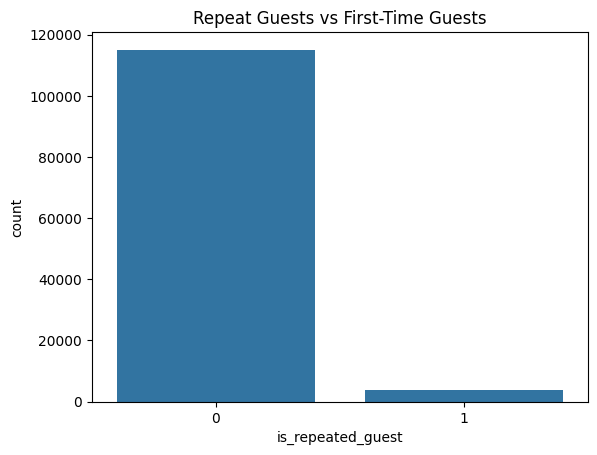

In [ ]:
# Repeat guests
sns.countplot(data=data, x='is_repeated_guest')
plt.title('Repeat Guests vs First-Time Guests')
plt.show()




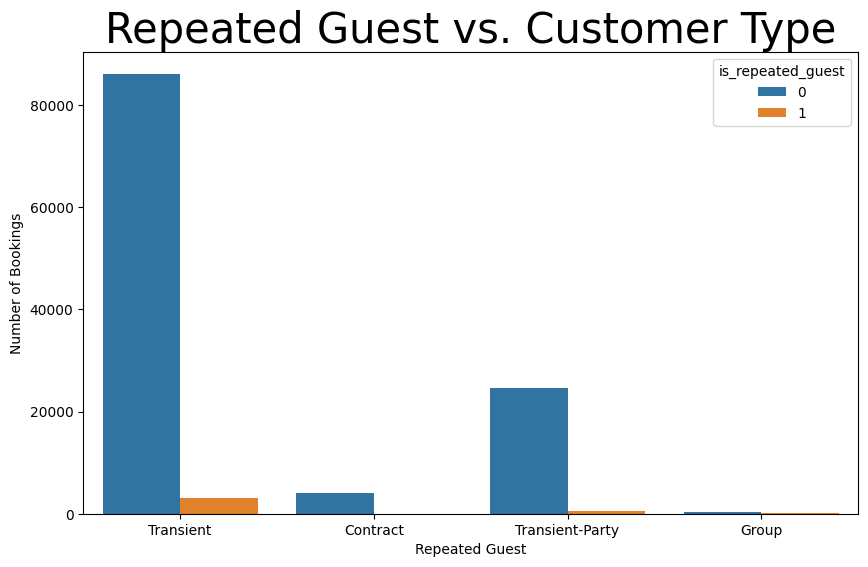

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', hue='is_repeated_guest', data=data)
plt.title('Repeated Guest vs. Customer Type',fontsize=30)
plt.xlabel('Repeated Guest')
plt.ylabel('Number of Bookings')
plt.show()

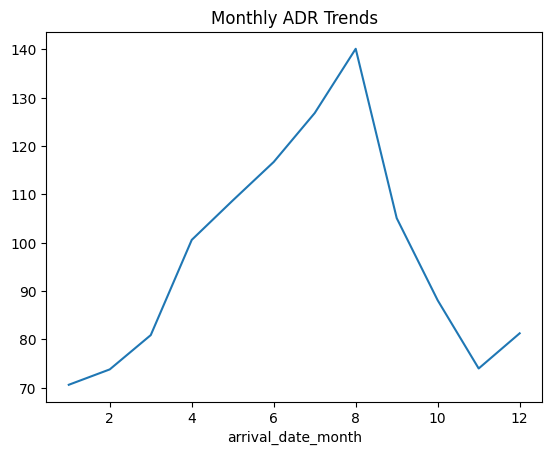

In [ ]:



monthly_adr = data.groupby('arrival_date_month')['adr'].mean()
monthly_adr.plot(kind='line')
plt.title('Monthly ADR Trends')
plt.show()


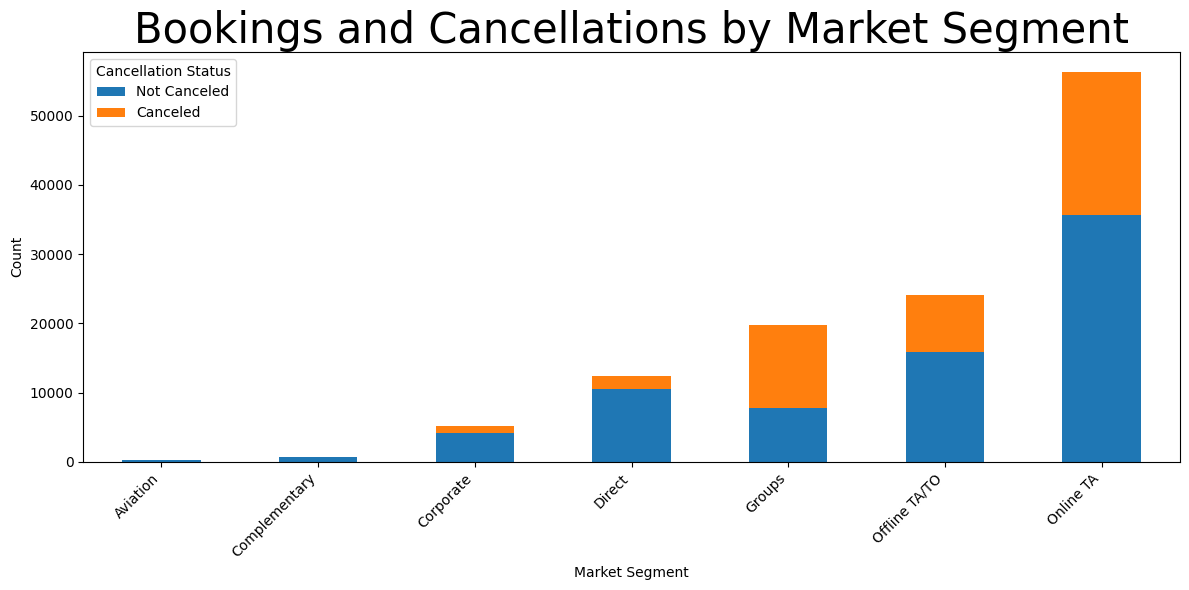

In [ ]:
market_segment_bookings = data.groupby(['market_segment', 'is_canceled'])['is_canceled'].count().unstack()


market_segment_bookings = market_segment_bookings.fillna(0)

market_segment_bookings.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Bookings and Cancellations by Market Segment', fontsize=30)
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

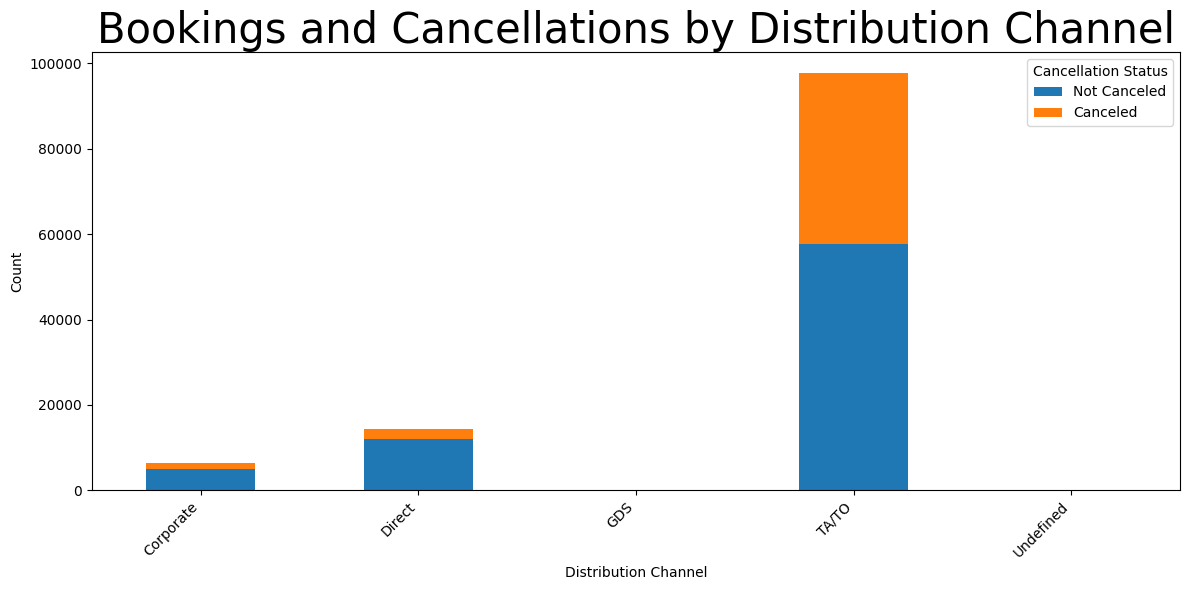

In [ ]:
distribution_channel_bookings = data.groupby(['distribution_channel', 'is_canceled'])['is_canceled'].count().unstack()


distribution_channel_bookings = distribution_channel_bookings.fillna(0)


distribution_channel_bookings.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Bookings and Cancellations by Distribution Channel', fontsize=30)
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()